## Interagindo com Banco de Dados Relacional

### MySQL

### pip install mysql-connector-python

In [1]:
#pip instal pandas

# Importação de bibliotecas
import mysql.connector
from mysql.connector import errorcode
from datetime import date, datetime
import pandas as pd

# Estabelece a conexão com o banco de dados
try:
    conn = mysql.connector.connect(user='root', password='master',
                              host='localhost',
                              database='bd',
                              autocommit=False)
except mysql.connector.Error as error:
    print("Não foi possível realizar a conexão com o banco de dados {}.".format(error))

# Apresenta o valor da propriedade autocommit. 
print(conn.autocommit)   
conn.autocommit = True
print(conn.autocommit)
conn.autocommit = False
print(conn.autocommit)

False
True
False


##### Eliminando tabelas no Banco de Dados

In [2]:
drop = {}
drop['empregado'] = ("DROP TABLE `empregado`")
drop['departamento'] = ("DROP TABLE `departamento`")    

try:
    cursor = conn.cursor()

    for table_name in drop:
        command = drop[table_name]
        try:
            print("Eliminando a tabela {}: ".format(table_name), end='')
            cursor.execute(command)
        except mysql.connector.Error as err:
            if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
                print("Tabela ", table_name, " não eliminada!!!.")
            else:
                print(err.msg)
        else:
            print("Tabela", table_name, "eliminada!!!.")
except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close()   

Eliminando a tabela empregado: Unknown table 'bd.empregado'
Eliminando a tabela departamento: Unknown table 'bd.departamento'


##### Criando tabelas no Banco de Dados

In [3]:
tables = {}
tables['departamento'] = (
    "CREATE TABLE `departamento` ("
    "  `id_depto` integer NOT NULL AUTO_INCREMENT,"
    "  `nome` varchar(100) NOT NULL,"
    "  PRIMARY KEY (`id_depto`)"
    ")")    
tables['empregado'] = (
    "CREATE TABLE `empregado` ("
    "  `id_emp` INTEGER NOT NULL AUTO_INCREMENT,"
    "  `nome` VARCHAR(100) NOT NULL,"
    "  `data_nascimento` timestamp,"
    "  `data_contratacao` timestamp,"
    "  `id_depto` integer,"
    "  PRIMARY KEY (`id_emp`),"
    "  FOREIGN KEY(`id_depto`) REFERENCES `departamento` (`id_depto`)"
    ")")


In [4]:
try:
    cursor = conn.cursor()

    for table_name in tables:
        table_description = tables[table_name]
        try:
            print("Criando tabela {}: ".format(table_name), end='')
            cursor.execute(table_description)
        except mysql.connector.Error as err:
            if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
                print("Tabela",table_name,"já existe!!!")
            else:
                print(err.msg)
        else:
            print("Tabela",table_name,"criada com sucesso!!!")
except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close()        

Criando tabela departamento: Tabela departamento criada com sucesso!!!
Criando tabela empregado: Tabela empregado criada com sucesso!!!


##### Executando declarações SQL não parametrizáveis

In [5]:
# Insere alguns departamentos
try:
    cursor = conn.cursor()
    insert = ("INSERT INTO departamento (id_depto, nome) VALUES (1, 'Departamento 1')")
    cursor.execute(insert)
    print("Departamento inserido com sucesso!!!")
    insert = ("INSERT INTO departamento (id_depto, nome) VALUES (2, 'Departamento 2')")
    cursor.execute(insert)
    print("Departamento inserido com sucesso!!!")
    conn.commit()
except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
      cursor.close()  

Departamento inserido com sucesso!!!
Departamento inserido com sucesso!!!


In [6]:
# Insere um empregado
try:
    cursor = conn.cursor()
    insert = ("INSERT INTO empregado (nome, data_nascimento, data_contratacao, id_depto)" 
              "VALUES ('Empregado 1','1997-6-14','2022-10-10', 1)")
    cursor.execute(insert)
    conn.commit()
    print("Empregado inserido com sucesso!!!")
except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
      cursor.close()        

Empregado inserido com sucesso!!!


In [7]:
# Seleciona linhas da tabela empregado
try:
    cursor = conn.cursor()

    select = ("SELECT id_emp, nome, data_nascimento, data_contratacao, "
              "id_depto FROM empregado")

    cursor.execute(select)

    for (id_emp, nome, data_nascimento, data_contratacao, id_depto) in cursor:
      print("{}, {}, nascido em {:%d/%m/%Y}, foi contratado em {:%d/%m/%Y} para "
            "trabalhar no departamento {}.".format(id_emp, nome, data_nascimento, 
            data_contratacao, id_depto))

except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close()   

1, Empregado 1, nascido em 14/06/1997, foi contratado em 10/10/2022 para trabalhar no departamento 1.


In [8]:
# Elimina uma ou mais linhas da tabela empregado
try:
    cursor = conn.cursor()
    delete = ("DELETE FROM empregado WHERE nome = 'Empregado 1'")
    cursor.execute(delete)
    conn.commit()
    print("Exclusão ocorrida com sucesso!!!")
except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close()

Exclusão ocorrida com sucesso!!!


##### Executando declarações SQL parametrizáveis

In [9]:
try:
  
  cursor = conn.cursor()

  datetime = datetime.now()

  insert_employee = ("INSERT INTO empregado "
                "(nome, data_nascimento, data_contratacao, id_depto) "
                "VALUES (%s, %s, %s, %s)")

  data_employee = ('Empregado 1', date(1977, 6, 14), datetime, 1)

  many_data_employee = [
    ('Empregado 2', date(1980, 2, 12), datetime, 1),
    ('Empregado 3', date(1999, 5, 23), datetime, 1),
    ('Empregado 4', date(1987, 10, 3), datetime, 2),
    ('Empregado 5', date(1993, 7, 11), datetime, 2)
  ]

    # Reinicia o auto incremental
  cursor.execute("ALTER TABLE bd.empregado AUTO_INCREMENT = 0")
  print("O valor auto incremental da Chave Primária foi reiniciado!!!")

  # Insere um empregado
  cursor.execute(insert_employee, data_employee)
  print("Empregado inserido com sucesso!!!")

  # Insere vários empregados
  cursor.executemany(insert_employee, many_data_employee)
  print("Empregados inseridos com sucesso!!!")

  conn.commit()

except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close() 

O valor auto incremental da Chave Primária foi reiniciado!!!
Empregado inserido com sucesso!!!
Empregados inseridos com sucesso!!!


In [10]:
try:
  
  # Prepared: Indica que determinada consulta será verificada no cache do banco de dados antes 
  # de ser excutada. Este processo otimiza o processamento, pois reduz a quantidade de compilações
  # de consultas. 
  cursor = conn.cursor(prepared=True)

  query = ("SELECT id_emp, nome, data_nascimento, data_contratacao, id_depto FROM empregado "
          "WHERE data_nascimento BETWEEN %s AND %s")

  hire_start = date(1977, 1, 1)
  hire_end = date(1993, 12, 31)

  cursor.execute(query, (hire_start, hire_end))

  for (id_emp, nome, data_nascimento, data_contratacao, id_depto) in cursor:
    print("{}, {}, nascido(a) em {:%d/%m/%Y}, foi contratado(a) em {:%d/%m/%Y} para trabalhar no departamento {}".format(
      id_emp, nome, data_nascimento, data_contratacao, id_depto))

except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close() 

3, Empregado 1, nascido(a) em 14/06/1977, foi contratado(a) em 03/06/2025 para trabalhar no departamento 1
4, Empregado 2, nascido(a) em 12/02/1980, foi contratado(a) em 03/06/2025 para trabalhar no departamento 1
6, Empregado 4, nascido(a) em 03/10/1987, foi contratado(a) em 03/06/2025 para trabalhar no departamento 2
7, Empregado 5, nascido(a) em 11/07/1993, foi contratado(a) em 03/06/2025 para trabalhar no departamento 2


In [11]:
try:
  
  cursor = conn.cursor()

  query = ("UPDATE empregado set id_depto = %s "
          " WHERE nome = %s")

  cursor.execute(query, (2, 'Empregado 1'))
  
  print("Atualização realizado com sucesso!!!")

  conn.commit()

except mysql.connector.Error as error:
    print("Ocorreu um erro durante o processamento {}.".format(error))
finally:
    if conn.is_connected():
        cursor.close() 

Atualização realizado com sucesso!!!


#### Realizando uma consulta com função de agregação e apresentando o gráfico resultante

In [12]:
# Executa uma consulta com agregação e armazena o resultado em um DataFrame
query = ("select d.nome as 'Nome do Departamento', count(*) as 'Total de Empregados' "
         " from empregado as e inner join departamento as d " 
	     " on e.id_depto = d.id_depto "
         " group by 1")
df = pd.read_sql(query, con = conn)
df

C:\Users\alexa\AppData\Local\Temp\ipykernel_43812\3108371157.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con = conn)


,Nome do Departamento,Total de Empregados
0,Departamento 1,2
1,Departamento 2,3


<Axes: xlabel='Nome do Departamento'>

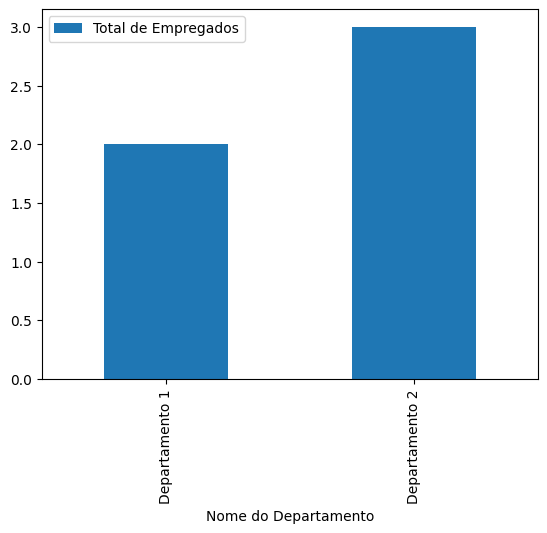

In [13]:
df.plot(kind="bar", x="Nome do Departamento")

In [26]:
if conn.is_connected():
    try:
        conn.close()
        print("Conexão encerrada com sucesso!!!")
    except mysql.connector.Error as error:
        print("Ocorreu um erro durante o processamento {}.".format(error))


Conexão encerrada com sucesso!!!


### PostgreSQL

### pip install psycopg2

In [17]:
import psycopg2
cnx = psycopg2.connect(host='localhost', port='5432', database='bd', user='postgres', password='master')
cursor = cnx.cursor()
cnx.autocommit

False

In [18]:
sql = 'create table cidade (id serial primary key, nome varchar(100), uf varchar(2))'
try:
    cursor.execute(sql)
except Exception as err:
    print("Tabela já existe.")
    cnx.rollback()
else:
    print("OK")

OK


In [19]:
sql = "insert into cidade values (default,'Santa Catarina','SC')"
cursor.execute(sql)

In [20]:
cursor.execute('select * from cidade')
recset = cursor.fetchall()
for rec in recset:
    print (rec)

(1, 'Santa Catarina', 'SC')


In [21]:
cnx.commit()

In [22]:
cnx.close()